In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys
from pathlib import Path

# Ensure project root is on path so we can import config
project_root = Path.cwd() if (Path.cwd() / "config.py").exists() else Path.cwd().parent
sys.path.insert(0, str(project_root))

from config import PROJECT_ROOT, DATA_RAW, DATA_PROCESSED
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows

In [28]:
df = pd.read_csv(DATA_PROCESSED/"daily_metrics.csv",
    parse_dates=["date","start_time", "end_time", "falling_asleep_time", "wakeup_time", "sleep_midpoint" , "date_of_sleep"]
)


In [29]:
timedelta_cols = ["time_in_bed", "time_to_fall_asleep", "time_to_wake_up"]
for col in timedelta_cols:
    df[col] = pd.to_timedelta(df[col], errors="coerce")

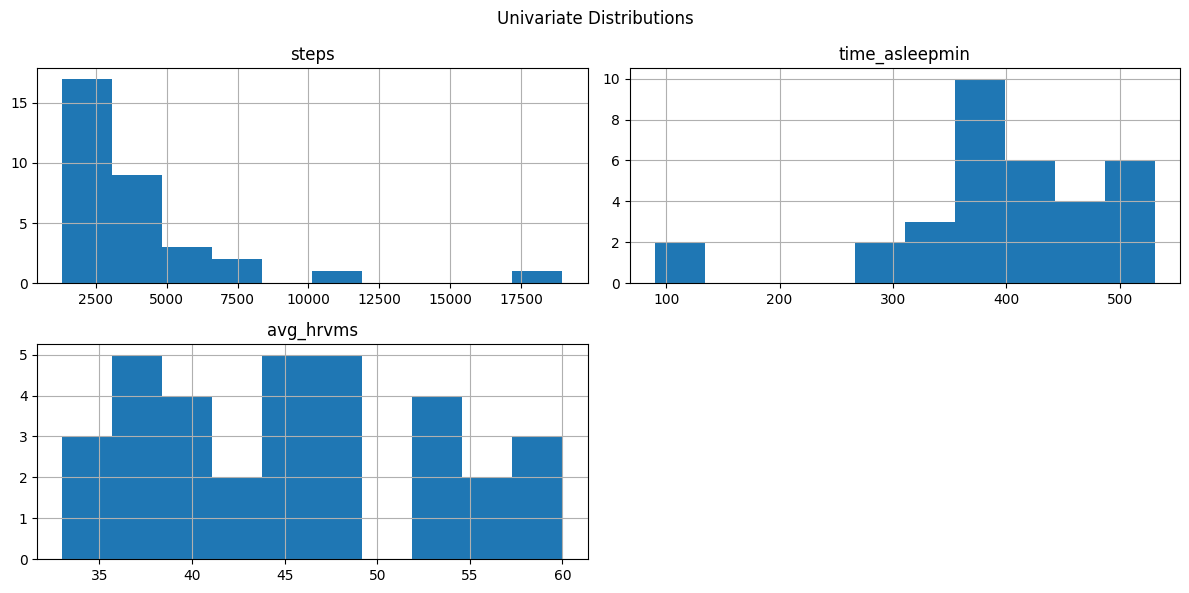

In [31]:
cols = [
    "steps",
    "time_asleepmin",
    "avg_hrvms"
]

df[cols].hist(bins=10, figsize=(12, 6))
plt.suptitle("Univariate Distributions")
plt.tight_layout()
plt.show()

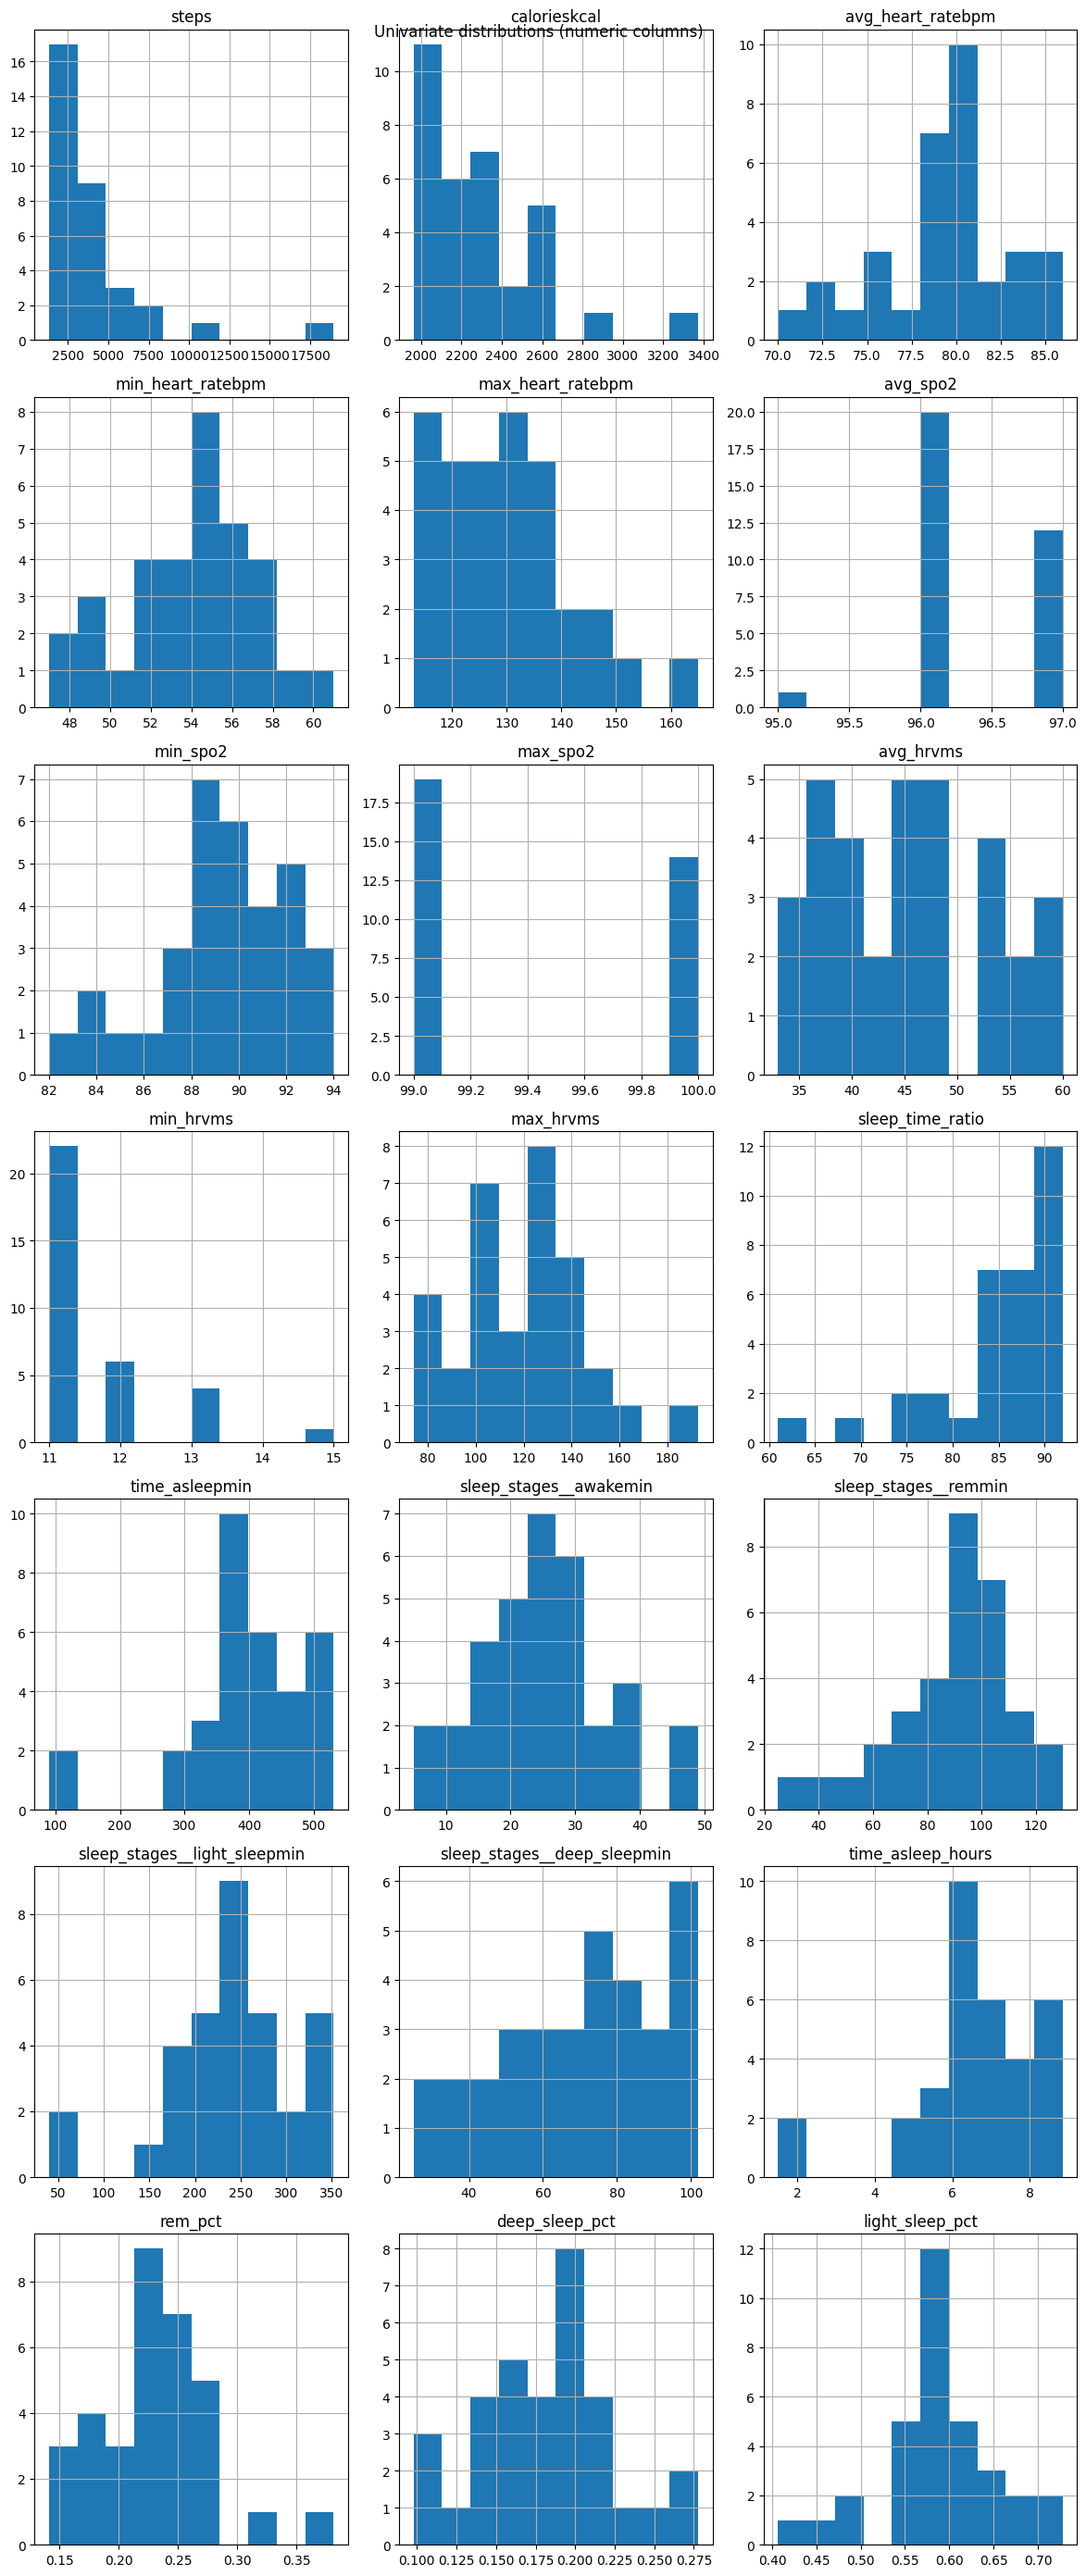

In [32]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms for each; layout adjusts to number of columns
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row, or use 4 if you prefer
df[numeric_cols].hist(bins=10, figsize=(4 * 3, 4 * n_rows), layout=(n_rows, 3))
plt.suptitle("Univariate distributions (numeric columns)")
plt.tight_layout()
plt.show()

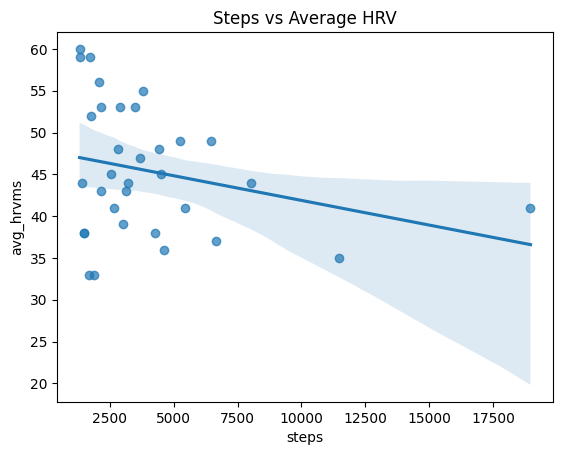

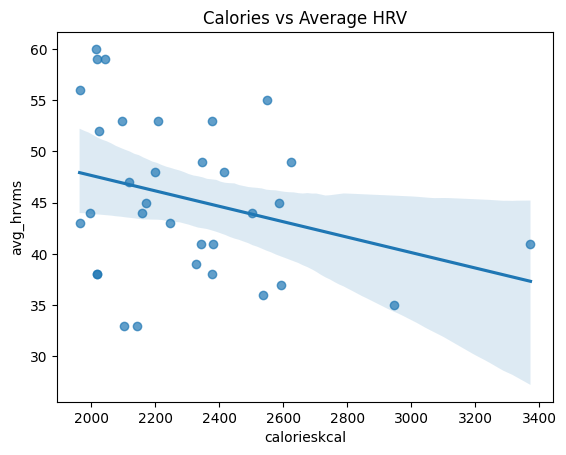

In [37]:
sns.regplot(
    data=df,
    x="steps",
    y="avg_hrvms",
    scatter_kws={"alpha": 0.7}
)
plt.title("Steps vs Average HRV")
plt.show()

sns.regplot(
    data=df,
    x="calorieskcal",
    y="avg_hrvms",
    scatter_kws={"alpha": 0.7}
)
plt.title("Calories vs Average HRV")
plt.show()



#### We can see that, as the number of steps and calorie burnt increase, the HRV decreases. 

In [38]:
df['avg_hrvms'].describe()

count    33.000000
mean     45.424242
std       7.709695
min      33.000000
25%      39.000000
50%      44.000000
75%      52.000000
max      60.000000
Name: avg_hrvms, dtype: float64